## Extracting Data

Easily extract tables from websites with pandas and python

source: https://www.singstat.gov.sg/

1. _**".\Data\Air Cargo Discharged By Origin Monthly.xlsx"**_

Air Cargo Discharged By Region/Country Of Origin, Monthly(Tonnes)

2. _**".\Data\Air Cargo Loaded By Destination Monthly.xlsx"**_

Air Cargo Loaded By Region/Country Of Destination, Monthly(Tonnes)

3. _**".\Data\Air Passenger Departures By Destination of Disembarkation Monthly.xlsx"**_

Air Passenger Departures By Region/Country Of Disembarkation, Monthly(number of passenger)

4. _**".\Data\Air Passenger Arrivals By Origin of Embarkation Monthly.xlsx"**_

 Air Passenger Arrivals By Region/Country Of Embarkation, Monthly(number of passenger)

5. _**".\Data\Civil Aircraft Arrivals And Departures Passengers And Mail Monthly.xlsx"**_

 Civil Aircraft Arrivals And Departures, Passengers And Mail, Monthly(number of Airplanes,passenger,mail)
 
 

In [150]:
from pandas.io.html import read_html
import pandas as pd
import matplotlib.pyplot as plt


#Extract tables XLSX
#Air Cargo in Tonne
Airfreight_incoming=pd.read_excel(".\Data\Air Cargo Discharged By Origin Monthly.xlsx",skiprows=5, skipfooter=16, na_values=['na'],index_col=0)
Airfreight_incoming.columns = pd.to_datetime(Airfreight_incoming.columns)

Airfreight_outgoing=pd.read_excel(".\Data\Air Cargo Loaded By Destination Monthly.xlsx",skiprows=5, skipfooter=16, na_values=['na'],index_col=0)
Airfreight_outgoing.columns = pd.to_datetime(Airfreight_outgoing.columns)

#Number of Passengers
Passenger_Departure=pd.read_excel(".\Data\Air Passenger Departures By Destination of Disembarkation Monthly.xlsx",skiprows=5, skipfooter=20, na_values=['na'],index_col=0)
Passenger_Departure.columns = pd.to_datetime(Passenger_Departure.columns)

Passenger_Arrivals =pd.read_excel(".\Data\Air Passenger Arrivals By Origin of Embarkation Monthly.xlsx",skiprows=5, skipfooter=20, na_values=['na'],index_col=0)
Passenger_Arrivals.columns = pd.to_datetime(Passenger_Arrivals.columns)

#Number of Aircraft/Passengers/Mail
Aircrafts_Arrival_Departure=pd.read_excel(".\Data\Civil Aircraft Arrivals And Departures Passengers And Mail Monthly.xlsx",skiprows=5, skipfooter=25, na_values=['na'],index_col=0)
Aircrafts_Arrival_Departure.columns = pd.to_datetime(Aircrafts_Arrival_Departure.columns)

start = pd.to_datetime("2019 Jun")
end = pd.to_datetime("2020 Jun")
#print("Extracted {num} tables".format(num=len(tables)))


### Subsetting Dataframe 

In [151]:
List_df=[Airfreight_incoming,Airfreight_outgoing,Passenger_Departure,Passenger_Arrivals,Aircrafts_Arrival_Departure]
list_df2=[0,0,0,0,0]
list_name=["Airfreight_incoming","Airfreight_outgoing","Passenger_Departure","Passenger_Arrivals","Aircrafts_Arrival_Departure"]

for idx, val in enumerate(List_df):
    list_df2[idx]=val.iloc[:,val.columns>=start]



In [139]:
#list_df2[3]

In [152]:
#list_df2[4]

In [142]:
#type(list_df2[0].loc[['Total']].pct_change()*100)
#list_df2[0].loc[['Total']].pct_change(axis='columns')*100
#datatype returned is a series

## Plotting AirFrieght

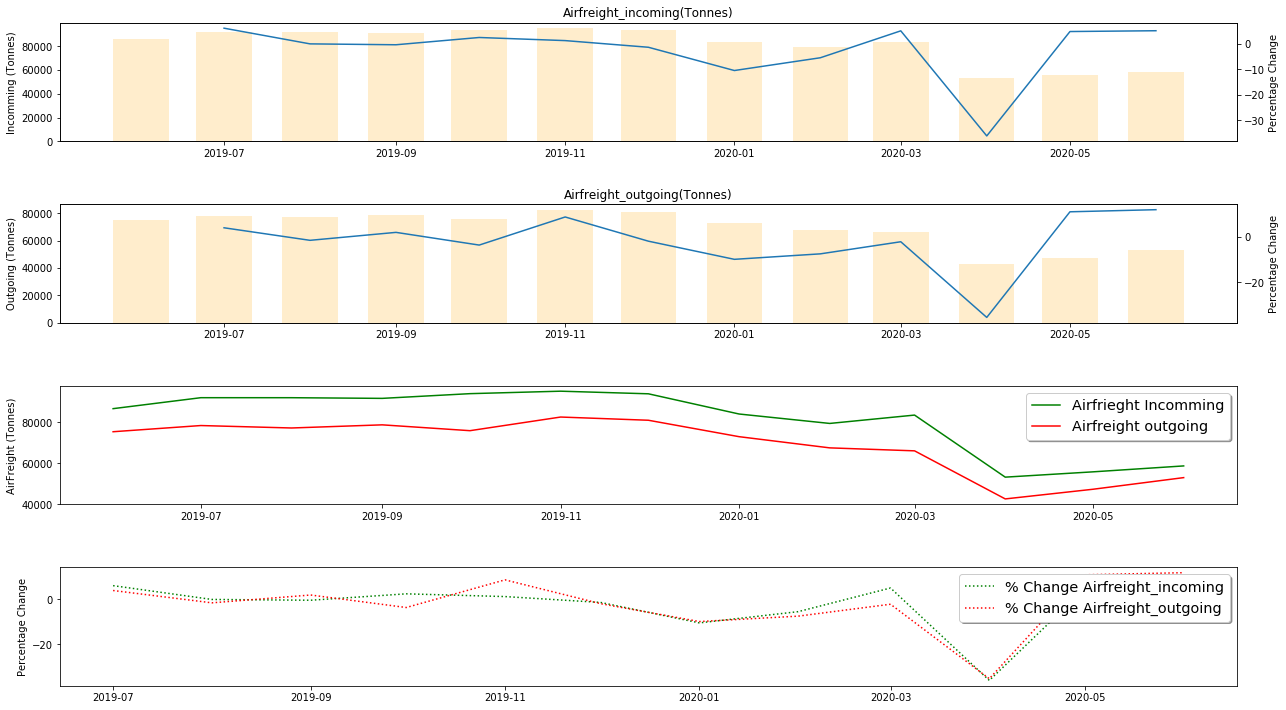

In [153]:

n=0
m=1
fig, (ax1,ax3,ax5,ax7) = plt.subplots(4,1)
fig.set_size_inches(18.5, 10.5)

#in Tonnes (example 80,000 Tonnes)

#Plot 1 :AirFrieght Incomming
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(list_df2[n].loc['Total',:].pct_change()*100) #plot the Revenue on axis #1

ax1.bar(list_df2[n].columns,list_df2[n].loc['Total'] ,width=20, alpha=0.2, color='orange')
ax2.grid(b=False)
ax1.set_title(list_name[n]+"(Tonnes)")
ax1.set_ylabel('Incomming (Tonnes)')
ax2.set_ylabel('Percentage Change')


#Plot 2 :AirFrieght Outgoing
ax4 = ax3.twinx()  # set up the 2nd axis
ax4.plot(list_df2[m].loc['Total',:].pct_change()*100) #plot the Revenue on axis #1

ax3.bar(list_df2[m].columns,list_df2[m].loc['Total'] ,width=20, alpha=0.2, color='orange')
ax4.grid(b=False)
ax3.set_title(list_name[m]+"(Tonnes)")
ax3.set_ylabel('Outgoing (Tonnes)')
ax4.set_ylabel('Percentage Change')

#Plot 3 :AirFrieght Incomming/outgoing
ax5.plot(list_df2[n].loc['Total'],'g',label='Airfrieght Incomming') #plot the Revenue on axis #1
ax5.plot(list_df2[m].loc['Total'],'r',label='Airfreight outgoing') #plot the Revenue on axis #1


#Plot 4 :% Change AirFrieght Incomming/outgoing
ax7.plot(list_df2[n].loc['Total',:].pct_change()*100,'g:',label='% Change '+ list_name[n])
ax7.plot(list_df2[m].loc['Total',:].pct_change()*100,'r:',label='% Change '+ list_name[m])

ax5.set_ylabel('AirFreight (Tonnes)')
ax7.set_ylabel('Percentage Change')
legend = ax5.legend(loc='upper right', shadow=True, fontsize='x-large')
legend = ax7.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.tight_layout(pad=3.0)


## Plotting Passengers


In [154]:
passenger_D=list_df2[2].loc[['Number Of Air Passenger Departures']]
passenger_A=list_df2[3].loc[['Number Of Air Passenger Arrivals']]
p_passenger_D=list_df2[2].loc[['Number Of Air Passenger Departures']].pct_change(axis='columns')*100
p_passenger_A=list_df2[3].loc[['Number Of Air Passenger Arrivals']].pct_change(axis='columns')*100
frames = [passenger_D, passenger_A,p_passenger_D,p_passenger_A]
result = pd.concat(frames)
pd.options.display.float_format = '{:,.2f}'.format
result.round(2)


,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00
Variables,,,,,,,,,,,,,
Number Of Air Passenger Departures,"2,834,087.00","2,853,267.00","2,911,530.00","2,682,724.00","2,801,262.00","2,855,679.00","3,132,828.00","2,893,053.00","1,718,033.00","791,383.00","17,340.00","20,400.00","34,190.00"
Number Of Air Passenger Arrivals,"2,920,788.00","2,986,187.00","2,926,617.00","2,726,048.00","2,787,094.00","2,814,414.00","3,231,750.00","3,000,922.00","1,687,083.00","828,317.00","5,776.00","3,976.00","13,996.00"
Number Of Air Passenger Departures,nan,0.68,2.04,-7.86,4.42,1.94,9.71,-7.65,-40.62,-53.94,-97.81,17.65,67.60
Number Of Air Passenger Arrivals,nan,2.24,-1.99,-6.85,2.24,0.98,14.83,-7.14,-43.78,-50.90,-99.30,-31.16,252.01


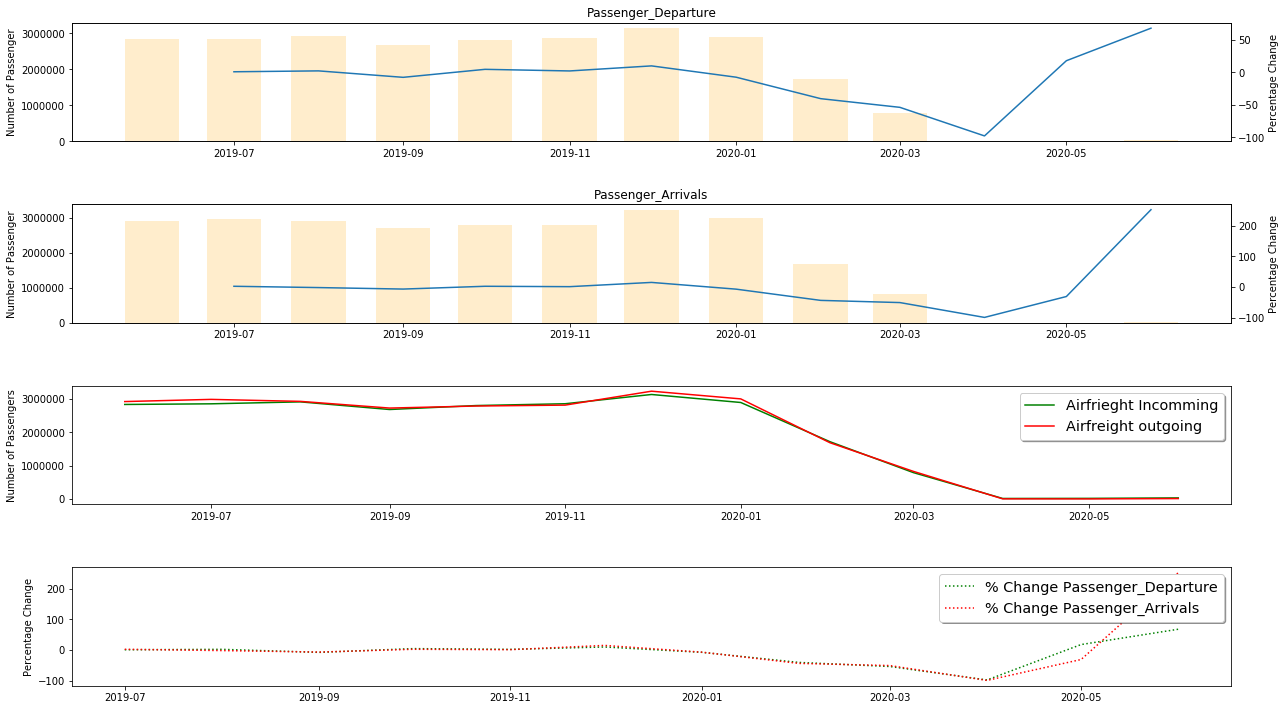

In [155]:
n=2
m=3
fig, (ax1,ax3,ax5,ax7) = plt.subplots(4,1)
fig.set_size_inches(18.5, 10.5)

#in number of people (example 2,000,000 number of poeple)

#Plot 1 :Passenger_Departure
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(list_df2[n].loc['Number Of Air Passenger Departures',:].pct_change()*100) #plot the Revenue on axis #1

ax1.bar(list_df2[n].columns,list_df2[n].loc['Number Of Air Passenger Departures'] ,width=20, alpha=0.2, color='orange')
ax2.grid(b=False)
ax1.set_title(list_name[n])
ax1.set_ylabel('Number of Passenger')
ax2.set_ylabel('Percentage Change')

#Plot 2 :Passenger_Arrivals
ax4 = ax3.twinx()  # set up the 2nd axis
ax4.plot(list_df2[m].loc['Number Of Air Passenger Arrivals',:].pct_change()*100) #plot the Revenue on axis #1

ax3.bar(list_df2[m].columns,list_df2[m].loc['Number Of Air Passenger Arrivals'] ,width=20, alpha=0.2, color='orange')
ax4.grid(b=False)
ax3.set_title(list_name[m])
ax3.set_ylabel('Number of Passenger')
ax4.set_ylabel('Percentage Change')

#Plot 3 :Passenger_Departure/Arrivals
ax5.plot(list_df2[n].loc['Number Of Air Passenger Departures'],'g',label='Airfrieght Incomming') #plot the Revenue on axis #1
ax5.plot(list_df2[m].loc['Number Of Air Passenger Arrivals'],'r',label='Airfreight outgoing') #plot the Revenue on axis #1

#Plot 4 :% Change Passenger_Departure/Arrivals
ax7.plot(list_df2[n].loc['Number Of Air Passenger Departures',:].pct_change()*100,'g:',label='% Change '+ list_name[n])
ax7.plot(list_df2[m].loc['Number Of Air Passenger Arrivals',:].pct_change()*100,'r:',label='% Change '+ list_name[m])

ax5.set_ylabel('Number of Passengers')
ax7.set_ylabel('Percentage Change')
legend = ax5.legend(loc='upper right', shadow=True, fontsize='x-large')
legend = ax7.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.tight_layout(pad=3.0)

## Plotting Aircraft Departures and Arrivals

In [156]:
Aircraft_D=list_df2[4].loc[['Aircraft Departures * (Number)']]
Aircraft_A=list_df2[4].loc[['Aircraft Arrivals * (Number)']]
p_Aircraft_D=list_df2[4].loc[['Aircraft Departures * (Number)']].pct_change(axis='columns')*100
p_Aircraft_A=list_df2[4].loc[['Aircraft Arrivals * (Number)']].pct_change(axis='columns')*100
frames = [Aircraft_D, Aircraft_A,p_Aircraft_D,p_Aircraft_A]
result = pd.concat(frames)
pd.options.display.float_format = '{:,.2f}'.format
result.round(2)

,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00
Variables,,,,,,,,,,,,,
Aircraft Departures * (Number),"15,696.00","16,193.00","16,183.00","15,590.00","15,980.00","15,802.00","16,669.00","16,716.00","13,116.00","8,077.00","1,945.00","2,235.00","2,389.00"
Aircraft Arrivals * (Number),"15,695.00","16,196.00","16,181.00","15,589.00","15,978.00","15,796.00","16,675.00","16,719.00","13,115.00","8,146.00","1,920.00","2,237.00","2,390.00"
Aircraft Departures * (Number),nan,3.17,-0.06,-3.66,2.50,-1.11,5.49,0.28,-21.54,-38.42,-75.92,14.91,6.89
Aircraft Arrivals * (Number),nan,3.19,-0.09,-3.66,2.50,-1.14,5.56,0.26,-21.56,-37.89,-76.43,16.51,6.84


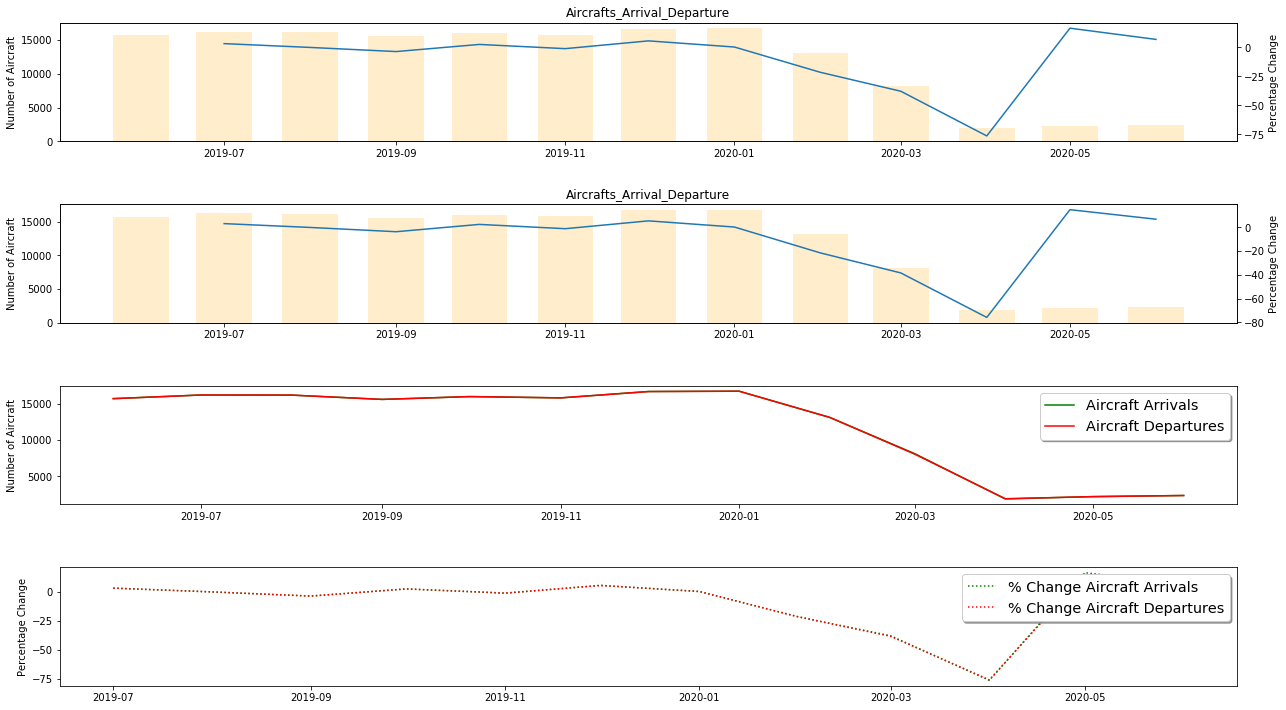

In [157]:
n=4
m=4
fig, (ax1,ax3,ax5,ax7) = plt.subplots(4,1)
fig.set_size_inches(18.5, 10.5)

#in number of people (example 2,000,000 number of poeple)

#Plot 1 :Passenger_Departure
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(list_df2[n].loc['Aircraft Arrivals * (Number)',:].pct_change()*100) #plot the Revenue on axis #1

ax1.bar(list_df2[n].columns,list_df2[n].loc['Aircraft Arrivals * (Number)'] ,width=20, alpha=0.2, color='orange')
ax2.grid(b=False)
ax1.set_title(list_name[n])
ax1.set_ylabel('Number of Aircraft')
ax2.set_ylabel('Percentage Change')

#Plot 2 :Passenger_Arrivals
ax4 = ax3.twinx()  # set up the 2nd axis
ax4.plot(list_df2[m].loc['Aircraft Departures * (Number)',:].pct_change()*100) #plot the Revenue on axis #1

ax3.bar(list_df2[m].columns,list_df2[m].loc['Aircraft Departures * (Number)'] ,width=20, alpha=0.2, color='orange')
ax4.grid(b=False)
ax3.set_title(list_name[m])
ax3.set_ylabel('Number of Aircraft')
ax4.set_ylabel('Percentage Change')

#Plot 3 :Passenger_Departure/Arrivals
ax5.plot(list_df2[n].loc['Aircraft Arrivals * (Number)'],'g',label='Aircraft Arrivals') #plot the Revenue on axis #1
ax5.plot(list_df2[m].loc['Aircraft Departures * (Number)'],'r',label='Aircraft Departures') #plot the Revenue on axis #1

#Plot 4 :% Change Passenger_Departure/Arrivals
ax7.plot(list_df2[n].loc['Aircraft Arrivals * (Number)',:].pct_change()*100,'g:',label='% Change Aircraft Arrivals')
ax7.plot(list_df2[m].loc['Aircraft Departures * (Number)',:].pct_change()*100,'r:',label='% Change Aircraft Departures')

ax5.set_ylabel('Number of Aircraft')
ax7.set_ylabel('Percentage Change')
legend = ax5.legend(loc='upper right', shadow=True, fontsize='x-large')
legend = ax7.legend(loc='upper right', shadow=True, fontsize='x-large')
fig.tight_layout(pad=3.0)

## Generation of the ATM Systems used in Singapore!
In Singapore, majority of the rules and procedure are in gen 3. According to the AIP, there is a Handbook called <a href="https://www.caas.gov.sg/legislation-regulations/guidelines-advisory/air-navigation-services/aeronautical-information-publication-amendments" target="_blank">“ATFM Users Handbook”</a>  for air traffic flow management and therefore in the procedure of air traffric flow management, singapore is in gen 4 and is relatively well established.

In terms of Communication, Singapore is in gen 3 using voice VHF/HF over ocean(AIP pg146). Singapore also uses Controller Pilot Data Link Communications (<a href="https://www.skybrary.aero/index.php/Controller_Pilot_Data_Link_Communications_(CPDLC)" target="_blank">CPDLC</a>) as a supplementary means of communication to the use of voice communication. It is a text based communication, however, the method is poor interms of situational awareness because messages are not broad casted to all planes in the vicinity. It is mainly used for non-time-critical communications.

For Navigation singapore employs ground based navigation and thus falls under gen 3. GPS navigation is still not a widely accepted for primary navigation because it is controlled by a single country.

For Survelliance, Singapore employs radar and is transitioning towards gen 4 with the implimentation of ADS-B. The primary servellance radar uses Skin effect. Secondary radar requires an airborne transponder which responds to the receipt of a pulse from a ground-based antenna by transmitting a return signal(<a href="https://vfrg.casa.gov.au/general/radar-transponders/primary-and-secondary-radar/" target="_blank">source</a>).
Singapore also transitioning to a Satallite based survillance in the form of Automatic Dependent Surveillance – Broadcast (ADS-B).

For Automation, Singapore is in gen 3 where weather and wind data from neighbouring airspace are collected automatically fused to gether. Other forms of Automation includes Chatbot employed for Taxi operations

Finally interms of Human ATC singapore is mostly in gen 3. Typically every sector in the FIR is mannned by two ATC. One is the planning controller which handles or take over aircraft to reduce congestion while another is the radar controller which taks to pilot to resolve conflits. Radar controller typically employs a tool called Short term Conflict Alert (<a href="https://www.skybrary.aero/index.php/Short_Term_Conflict_Alert_(STCA)" target="_blank">STCA</a>)


Gate hold delay no congestion
See implementation before and after tech
<img src="img/Gen of ATM.png">
CAAS(n.d) __**BEYOND OUR BLUE SKIES - THE EDGE OF ENABLERS**__
Avaialbe: https://www.caas.gov.sg/who-we-are/our-organisation/our-publications/publication-details/publication/beyond-our-blue-skies-the-edge-of-enablers

CAAS(n.d) __**Augmenting ATM Capabilities Using Technology**__
Avaialbe: https://www.caas.gov.sg/who-we-are/areas-of-responsibility/ensuring-safe-efficient-air-traffic-flows/our-systems-technology

CAAS(16Jul2020) __**AIP Singapore**__
Avaialbe: https://www.caas.gov.sg/legislation-regulations/guidelines-advisory/air-navigation-services/aeronautical-information-publication-amendments